In [ ]:
import os 
import pandas as pd 
os.chdir("/home/lowie/data/")
coaid = pd.read_csv("textcols_tweets_newstext_added_preprocessed.csv",keep_default_na = False)

In [ ]:
coaid = coaid.sample(n=10000) #had to take a sample becasuse memory size not big enough when using all coaid data

In [ ]:
def get_jaccard_sim(str1, str2):
   a = set(str1.split())
   b = set(str2.split())
   c = a.intersection(b)
   return float(len(c)) / (len(a) + len(b) - len(c))

In [ ]:
def calc_avg_sim(data): 
    total = 0 
    teller = 0
    for i in range(len(data['text'])): 
        if i%100 == 0: 
            print(i)
        for j in range(i+1,len(data['text'])):
            total = total + get_jaccard_sim(data.iloc[i,0],data.iloc[j,0])
            teller = teller + 1 

    avg_sim = total/teller

    return avg_sim

Code for finding optimal number of clusters: 


In [ ]:
def cluster_text(text):
    vectorizer = TfidfVectorizer(stop_words={'english'})
    X = vectorizer.fit_transform(text)

    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    Sum_of_squared_distances = []
    K = range(2,10)
    for k in K:
       km = KMeans(n_clusters=k, max_iter=200, n_init=10)
       km = km.fit(X)
       Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

    print('How many clusters do you want to use?')
    true_k = int(input())
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
    model.fit(X)

    labels=model.labels_
    clusters=pd.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
    #print(clusters.sort_values(by=['cluster']))

    for i in range(true_k):
        print(clusters[clusters['cluster'] == i])
        
    return clusters

In [ ]:
txt = coaid['text']
txt_list = list(txt)

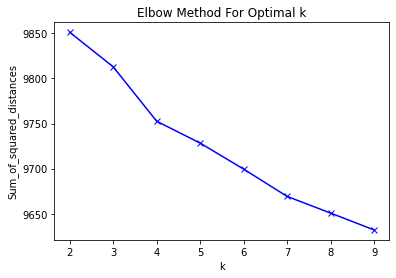

How many clusters do you want to use?


 7


                                                  title  cluster
0                   pandemic silver lining better sleep        0
3     stay safe home disinfecting surfaces wiping ha...        0
7           sports country reopening safe play softball        0
8     vereine gap testing capacity actual tests incr...        0
10    watching people grappling science viii increas...        0
...                                                 ...      ...
9987  n t miss summer money camp welcome take advant...        0
9988  mark calendars may global day giving emergency...        0
9989  unbelievable increases deaths week the ttc ret...        0
9990  nyc loose k every year flu coronavirus way con...        0
9993  re serious fixing racial disparities need thin...        0

[5370 rows x 2 columns]
                                                  title  cluster
5     nih clinical trial shows remdesivir accelerate...        1
153    nih clinical trial remdesivir treat covid begins        1


In [ ]:
clusters = cluster_text(txt_list)

In [ ]:
clusters = clusters.rename(columns={"title": "text"})
clusters

,text,cluster
0,pandemic silver lining better sleep,0
1,antiviral remdesivir prevents disease progress...,4
2,uk local authorities ready number deaths covid,4
3,stay safe home disinfecting surfaces wiping ha...,0
4,said covid testing dont test dont cases stoppe...,4
...,...,...
9995,united nations human settlements programme un ...,2
9996,contagious likely know youre sick,3
9997,covid could seasonal face warns coronavirus li...,4
9998,nih clinical trial investigations vaccine covi...,1


In [ ]:
df0 = clusters.loc[clusters['cluster'] == 0]
df1 = clusters.loc[clusters['cluster'] == 1]
df2 = clusters.loc[clusters['cluster'] == 2]
df3 = clusters.loc[clusters['cluster'] == 3]
df4 = clusters.loc[clusters['cluster'] == 4]
df5 = clusters.loc[clusters['cluster'] == 5]
df6 = clusters.loc[clusters['cluster'] == 6]


In [ ]:
total = (calc_avg_sim(df0)+calc_avg_sim(df1)+calc_avg_sim(df2)+calc_avg_sim(df3)+calc_avg_sim(df4)+calc_avg_sim(df5)+calc_avg_sim(df6))/7


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
0
100
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
0
100
200
300
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
0
100
200
300
0
